In [1]:
import glob
import os
import subprocess
import tarfile
import wget

import random
import numpy as np
import pandas as pd
import torch

from sklearn.model_selection import train_test_split

import nemo
import nemo.collections.asr as nemo_asr

import json
import librosa

import librosa
import json
import copy

from omegaconf import DictConfig
import copy

import pytorch_lightning as pl
from IPython.utils import io
from datetime import datetime
import json

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from itertools import zip_longest
from typing import Any, Callable, Dict, List, Optional

from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks import Callback
from pytorch_lightning.utilities import rank_zero_info

/media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/apex/pyprof/__init__.py:5: FutureWarning: pyprof will be removed by the end of June, 2022
  warnings.warn("pyprof will be removed by the end of June, 2022", FutureWarning)
################################################################################
### WARNING, path does not exist: KALDI_ROOT=media/boris/F/pykaldi/kaldi
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [2]:
from parts.models import EncDecCTCModelBPE_extended

In [3]:
import os
from omegaconf import DictConfig

try:
    from ruamel.yaml import YAML
except ModuleNotFoundError:
    from ruamel_yaml import YAML

yaml = YAML(typ='safe')

In [4]:
root_dir = '/media/boris/F/Research_final/'

In [5]:
models = {
#     'jasper': {
#         'config_path': f'{root_dir}conf/jasper/jasper_5x1.yaml',
#         'class': nemo_asr.models.EncDecCTCModel
#     },
#     'quartznet': {
#         'config_path': f'{root_dir}conf/quartznet/quartznet_15x5.yaml',
#         'class': nemo_asr.models.EncDecCTCModel
#     },
#     'citrinet': {
#         'config_path': f'{root_dir}conf/citrinet/citrinet_384.yaml',
#         'class': nemo_asr.models.EncDecCTCModelBPE
#     },
#     'carnelinet': {
#         'config_path': f'{root_dir}conf/carnelinet/carnelinet_384.yaml',
#         'class': nemo_asr.models.EncDecCTCModelBPE
#     },
    ### Unable to train on 200 paired
    'contextnet_rnnt': {
        'config_path': f'{root_dir}conf/contextnet_rnnt/config_rnnt_bpe.yaml',
        'class': nemo_asr.models.EncDecRNNTBPEModel
    },
    'conformer_ctc_bpe': {
        'config_path': f'{root_dir}conf/conformer/conformer_ctc_bpe.yaml',
        'class': nemo_asr.models.EncDecCTCModelBPE
    },
    'conformer_transducer': {
        'config_path': f'{root_dir}conf/conformer/conformer_transducer_bpe.yaml',
        'class': nemo_asr.models.EncDecRNNTBPEModel
    },
    'lstm_transducer_bpe': {
        'config_path': f'{root_dir}conf/lstm/lstm_transducer_bpe.yaml',
        'class': nemo_asr.models.EncDecRNNTBPEModel
    },
    'lstm_ctc_bpe': {
        'config_path': f'{root_dir}conf/lstm/lstm_ctc_bpe.yaml',
        'class': nemo_asr.models.EncDecCTCModelBPE
    },
}

In [6]:
class PrintTableMetricsCallback(Callback):
    def __init__(self) -> None:
        self.metrics: List = []

    def on_epoch_end(self, trainer: Trainer, pl_module: LightningModule) -> None:
        metrics_dict = copy.copy(trainer.callback_metrics)
        self.metrics.append(metrics_dict)

In [7]:
for model_name in models:
    print(model_name)
    config_path = models[model_name]['config_path']
    with open(config_path) as f:
        config = yaml.load(f)
    
    model = models[model_name]['class'].from_config_dict(DictConfig(config['model']))
    
    callback = PrintTableMetricsCallback()

    trainer = pl.Trainer(devices=1, accelerator='gpu', max_epochs=1, check_val_every_n_epoch=5,
                         callbacks=[callback])
    trainer.fit(model)

contextnet_rnnt
[NeMo I 2022-05-26 06:14:43 mixins:165] Tokenizer SentencePieceTokenizer initialized with 339 tokens
[NeMo I 2022-05-26 06:14:43 collections:186] Dataset loaded with 200 files totalling 0.16 hours
[NeMo I 2022-05-26 06:14:43 collections:187] 0 files were filtered totalling 0.00 hours
[NeMo I 2022-05-26 06:14:44 collections:186] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2022-05-26 06:14:44 collections:187] 0 files were filtered totalling 0.00 hours
[NeMo I 2022-05-26 06:14:44 features:259] PADDING: 16
[NeMo I 2022-05-26 06:14:44 features:276] STFT using torch
[NeMo I 2022-05-26 06:14:44 rnnt_models:210] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0}


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
[NeMo W 2022-05-26 06:14:44 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:385: LightningDeprecationWarning: The `Callback.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_end` instead.
      rank_zero_deprecation(
    
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[NeMo W 2022-05-26 06:14:46 modelPT:475] Trainer wasn't specified in model constructor. Make sure that you really wanted it.


[NeMo I 2022-05-26 06:14:46 modelPT:587] Optimizer config = Adam (
    Parameter Group 0
        amsgrad: False
        betas: [0.9, 0.999]
        eps: 1e-08
        foreach: None
        lr: 0.01
        maximize: False
        weight_decay: 0.0001
    )


[NeMo W 2022-05-26 06:14:46 lr_scheduler:816] Neither `max_steps` nor `iters_per_batch` were provided to `optim.sched`, cannot compute effective `max_steps` !
    Scheduler will not be instantiated !

  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | ConvASREncoder                    | 2.3 M 
2 | decoder           | RNNTDecoder                       | 930 K 
3 | joint             | RNNTJoint                         | 539 K 
4 | loss              | RNNTLoss                          | 0     
5 | spec_augmentation | SpectrogramAugmentation           | 0     
6 | wer               | RNNTBPEWER                        | 0     
------------------------------------------------------------------------
3.8 M     Trainable params
0         Non-trainable params
3.8 M     Total params
15.105    Total estimated model para

Sanity Checking: 0it [00:00, ?it/s]

[NeMo W 2022-05-26 06:14:46 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
      rank_zero_warn(
    
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
[NeMo W 2022-05-26 06:14:48 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/numba/cuda/compiler.py:726: NumbaPerformanceWarning: Grid size (4) < 2 * SM count (96) will likely result in GPU under utilization due to low occupancy.
      warn(NumbaPerformanceWarning(msg))
    
[NeMo W 2022-05-26 06:14:49 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/numba/cuda/compile

[NeMo I 2022-05-26 06:14:49 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:14:49 rnnt_wer_bpe:232] reference :rubout g m e f three nine
[NeMo I 2022-05-26 06:14:49 rnnt_wer_bpe:233] predicted :twentieth twentieth twentieth twentieth twentieth twentieth twentieth twentiethobzer hu twentieth hu twentieth hu twentieth hu twentieth hu twentieth hu twentieth hu twentieth hu hu huryl hunthnthnthnthnthnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnth

[NeMo W 2022-05-26 06:14:49 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/numba/cuda/compiler.py:726: NumbaPerformanceWarning: Grid size (4) < 2 * SM count (96) will likely result in GPU under utilization due to low occupancy.
      warn(NumbaPerformanceWarning(msg))
    
[NeMo W 2022-05-26 06:14:49 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/numba/cuda/compiler.py:726: NumbaPerformanceWarning: Grid size (1) < 2 * SM count (96) will likely result in GPU under utilization due to low occupancy.
      warn(NumbaPerformanceWarning(msg))
    


[NeMo I 2022-05-26 06:14:49 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:14:49 rnnt_wer_bpe:232] reference :rubout n i m n one
[NeMo I 2022-05-26 06:14:49 rnnt_wer_bpe:233] predicted :twentieth twentieth twentieth twentieth twentieth twentieth twentieth twentiethobzer hu twentieth hu twentieth hu twentieth hu twentieth hu twentieth hu twentieth hu twentieth hu hu huryl hunthnthnthnthnthnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnthnthctnthnt

[NeMo W 2022-05-26 06:14:49 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
      rank_zero_warn(
    


Training: 0it [00:00, ?it/s]

[NeMo W 2022-05-26 06:14:50 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/numba/cuda/compiler.py:726: NumbaPerformanceWarning: Grid size (1) < 2 * SM count (96) will likely result in GPU under utilization due to low occupancy.
      warn(NumbaPerformanceWarning(msg))
    


[NeMo I 2022-05-26 06:14:50 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:14:50 rnnt_wer_bpe:232] reference :no
[NeMo I 2022-05-26 06:14:50 rnnt_wer_bpe:233] predicted :aonel twentiethtem m twentieth twentieth twentieth twentieth m mee mnthreeanuanuobaob nine nine nine nine nine nineanu nine ninekkkanunthkkkkkaaaaaundraundr paanuanuanu kanu kanuanu kanuobreeaaaundraundr pel nine nineanuanuob nine nineanuwoanuepeat mtem mtem m m m m m m m m m m m m m m m m m m m m m m m m manuanuanuanuanuanutoberaanutoberaaael b b b b eleven june


[NeMo W 2022-05-26 06:14:51 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/numba/cuda/compiler.py:726: NumbaPerformanceWarning: Grid size (4) < 2 * SM count (96) will likely result in GPU under utilization due to low occupancy.
      warn(NumbaPerformanceWarning(msg))
    


[NeMo I 2022-05-26 06:14:51 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:14:51 rnnt_wer_bpe:232] reference :j u l i e
[NeMo I 2022-05-26 06:14:51 rnnt_wer_bpe:233] predicted :
[NeMo I 2022-05-26 06:14:51 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:14:51 rnnt_wer_bpe:232] reference :g c d o four
[NeMo I 2022-05-26 06:14:51 rnnt_wer_bpe:233] predicted :
[NeMo I 2022-05-26 06:14:52 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:14:52 rnnt_wer_bpe:232] reference :eight eight two eight one oh two
[NeMo I 2022-05-26 06:14:52 rnnt_wer_bpe:233] predicted :
[NeMo I 2022-05-26 06:14:52 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:14:52 rnnt_wer_bpe:232] reference :erase z y g n p eight hundred and twenty three
[NeMo I 2022-05-26 06:14:52 rnnt_wer_bpe:233] predicted :
[NeMo I 2022-05-26 06:14:52 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:14:52 rnnt_wer_bpe:232] reference :one five one three three
[NeMo I 2022-05-26 06:14:52 rnnt_wer_bpe:233] predicted :
[NeMo I 2022-05-26 06:14:53 rnnt_wer_

[NeMo I 2022-05-26 06:15:06 rnnt_wer_bpe:233] predicted :
[NeMo I 2022-05-26 06:15:06 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:15:06 rnnt_wer_bpe:232] reference :help
[NeMo I 2022-05-26 06:15:06 rnnt_wer_bpe:233] predicted :
[NeMo I 2022-05-26 06:15:07 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:15:07 rnnt_wer_bpe:232] reference :rubout w l f x y seven oh six nine
[NeMo I 2022-05-26 06:15:07 rnnt_wer_bpe:233] predicted :
[NeMo I 2022-05-26 06:15:07 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:15:07 rnnt_wer_bpe:232] reference :two six eight four four one eight
[NeMo I 2022-05-26 06:15:07 rnnt_wer_bpe:233] predicted :
[NeMo I 2022-05-26 06:15:07 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:15:07 rnnt_wer_bpe:232] reference :erase o j t k s thirty five
[NeMo I 2022-05-26 06:15:07 rnnt_wer_bpe:233] predicted :
[NeMo I 2022-05-26 06:15:08 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:15:08 rnnt_wer_bpe:232] reference :k u n t z
[NeMo I 2022-05-26 06:15:08 rnnt_wer_bpe:233] predict

[NeMo W 2022-05-26 06:15:08 ctc_bpe_models:309] Could not load dataset as `manifest_filepath` was None. Provided config : {'manifest_filepath': None, 'sample_rate': 22050, 'batch_size': 4, 'shuffle': False, 'num_workers': 8, 'pin_memory': True, 'use_start_end_token': False}


[NeMo I 2022-05-26 06:15:08 features:259] PADDING: 0
[NeMo I 2022-05-26 06:15:08 features:276] STFT using torch


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
[NeMo W 2022-05-26 06:15:09 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:385: LightningDeprecationWarning: The `Callback.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_end` instead.
      rank_zero_deprecation(
    
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[NeMo W 2022-05-26 06:15:09 modelPT:475] Trainer wasn't specified in model constructor. Make sure that you really wanted it.


[NeMo I 2022-05-26 06:15:09 modelPT:587] Optimizer config = AdamW (
    Parameter Group 0
        amsgrad: False
        betas: [0.9, 0.98]
        eps: 1e-08
        foreach: None
        lr: 5
        maximize: False
        weight_decay: 0.001
    )


[NeMo W 2022-05-26 06:15:09 lr_scheduler:816] Neither `max_steps` nor `iters_per_batch` were provided to `optim.sched`, cannot compute effective `max_steps` !
    Scheduler will not be instantiated !

  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | ConformerEncoder                  | 13.0 M
2 | decoder           | ConvASRDecoder                    | 60.2 K
3 | loss              | CTCLoss                           | 0     
4 | spec_augmentation | SpectrogramAugmentation           | 0     
5 | _wer              | WERBPE                            | 0     
------------------------------------------------------------------------
13.0 M    Trainable params
0         Non-trainable params
13.0 M    Total params
52.131    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

[NeMo I 2022-05-26 06:15:09 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:09 wer_bpe:213] reference:rubout g m e f three nine
[NeMo I 2022-05-26 06:15:09 wer_bpe:214] predicted:orty onortyasorty
[NeMo I 2022-05-26 06:15:10 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:10 wer_bpe:213] reference:rubout n i m n one
[NeMo I 2022-05-26 06:15:10 wer_bpe:214] predicted:ortyousa


Training: 0it [00:00, ?it/s]

[NeMo I 2022-05-26 06:15:10 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:10 wer_bpe:213] reference:erase m y a m seven
[NeMo I 2022-05-26 06:15:10 wer_bpe:214] predicted:orty zeroh sixty zersi anorty zerortyundrirty zerortyhobe marourasundr sixtyforty sixty thirtyortyyepeentiethuar three ninetanuaryentieth eleventhteriorty sixty no rubortyaseortykentiethterentie noortyirtyoutubout junen peaentieth no four fourteen panuaryrtyanuaryter fifty w k an threeberfoes eleventh onnteaiventieth oneanuaryunnentiethortyndrteras sixtyentiethye zer eightyxty anb four hek zerun


[NeMo W 2022-05-26 06:15:10 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:229: UserWarning: You called `self.log('learning_rate', ...)` in your `training_step` but the value needs to be floating point. Converting it to torch.float32.
      warning_cache.warn(
    


[NeMo I 2022-05-26 06:15:11 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:11 wer_bpe:213] reference:e a r l f o r d
[NeMo I 2022-05-26 06:15:11 wer_bpe:214] predicted:
[NeMo I 2022-05-26 06:15:11 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:11 wer_bpe:213] reference:erase v x s x two four nine nine
[NeMo I 2022-05-26 06:15:11 wer_bpe:214] predicted:ep seventy thouep thouep seventyep thouep thouep seventyep thou seventyep seventyep thouep seventygoep thouep
[NeMo I 2022-05-26 06:15:11 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:11 wer_bpe:213] reference:erase r b d k t fifty
[NeMo I 2022-05-26 06:15:11 wer_bpe:214] predicted:l
[NeMo I 2022-05-26 06:15:11 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:11 wer_bpe:213] reference:m e m o r y l a n e
[NeMo I 2022-05-26 06:15:11 wer_bpe:214] predicted:five
[NeMo I 2022-05-26 06:15:11 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:11 wer_bpe:213] reference:r q z h four
[NeMo I 2022-05-26 06:15:11 wer_bpe:214] predicted:fifteen n fifteen n fifteen n fif

[NeMo I 2022-05-26 06:15:17 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:17 wer_bpe:213] reference:two oh one four six four six oh eight three
[NeMo I 2022-05-26 06:15:17 wer_bpe:214] predicted:seventy m m seventy m m seventy seventy seventy m m six seventy seventy seventy m seventy seventy m seventy m seventy seventy seventy m seventy m
[NeMo I 2022-05-26 06:15:17 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:17 wer_bpe:213] reference:repeat
[NeMo I 2022-05-26 06:15:17 wer_bpe:214] predicted:
[NeMo I 2022-05-26 06:15:18 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:18 wer_bpe:213] reference:m a r g a r e t
[NeMo I 2022-05-26 06:15:18 wer_bpe:214] predicted:
[NeMo I 2022-05-26 06:15:18 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:18 wer_bpe:213] reference:march twentieth nineteen seventy
[NeMo I 2022-05-26 06:15:18 wer_bpe:214] predicted:i
[NeMo I 2022-05-26 06:15:18 wer_bpe:212] 
    
[NeMo I 2022-05-26 06:15:18 wer_bpe:213] reference:january fifteenth nineteen sixty three
[NeMo I 2022-05-2

[NeMo W 2022-05-26 06:15:19 rnnt_bpe_models:410] Could not load dataset as `manifest_filepath` was None. Provided config : {'manifest_filepath': None, 'sample_rate': 22050, 'batch_size': 16, 'shuffle': False, 'num_workers': 8, 'pin_memory': True, 'use_start_end_token': False}


[NeMo I 2022-05-26 06:15:19 features:259] PADDING: 0
[NeMo I 2022-05-26 06:15:19 features:276] STFT using torch


[NeMo W 2022-05-26 06:15:19 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
      warnings.warn("dropout option adds dropout after all but last "
    


[NeMo I 2022-05-26 06:15:19 rnnt_models:210] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0, 'clamp': -1.0}


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[NeMo W 2022-05-26 06:15:19 modelPT:475] Trainer wasn't specified in model constructor. Make sure that you really wanted it.


[NeMo I 2022-05-26 06:15:19 modelPT:587] Optimizer config = AdamW (
    Parameter Group 0
        amsgrad: False
        betas: [0.9, 0.98]
        eps: 1e-08
        foreach: None
        lr: 0.05
        maximize: False
        weight_decay: 0.0
    )


[NeMo W 2022-05-26 06:15:19 lr_scheduler:816] Neither `max_steps` nor `iters_per_batch` were provided to `optim.sched`, cannot compute effective `max_steps` !
    Scheduler will not be instantiated !

  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | ConformerEncoder                  | 13.0 M
2 | decoder           | RNNTDecoder                       | 930 K 
3 | joint             | RNNTJoint                         | 268 K 
4 | loss              | RNNTLoss                          | 0     
5 | spec_augmentation | SpectrogramAugmentation           | 0     
6 | wer               | RNNTBPEWER                        | 0     
------------------------------------------------------------------------
14.2 M    Trainable params
0         Non-trainable params
14.2 M    Total params
56.687    Total estimated model para

Sanity Checking: 0it [00:00, ?it/s]

[NeMo W 2022-05-26 06:15:21 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:724: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
      rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
    


lstm_transducer_bpe
[NeMo I 2022-05-26 06:15:21 mixins:165] Tokenizer SentencePieceTokenizer initialized with 339 tokens
[NeMo I 2022-05-26 06:15:21 collections:186] Dataset loaded with 200 files totalling 0.16 hours
[NeMo I 2022-05-26 06:15:21 collections:187] 0 files were filtered totalling 0.00 hours
[NeMo I 2022-05-26 06:15:21 collections:186] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2022-05-26 06:15:21 collections:187] 0 files were filtered totalling 0.00 hours


[NeMo W 2022-05-26 06:15:21 rnnt_bpe_models:410] Could not load dataset as `manifest_filepath` was None. Provided config : {'manifest_filepath': None, 'sample_rate': 22050, 'batch_size': 16, 'shuffle': False, 'num_workers': 4, 'pin_memory': True, 'use_start_end_token': False}


[NeMo I 2022-05-26 06:15:21 features:259] PADDING: 0
[NeMo I 2022-05-26 06:15:21 features:276] STFT using torch
[NeMo I 2022-05-26 06:15:22 rnnt_models:210] Using RNNT Loss : warprnnt_numba
    Loss warprnnt_numba_kwargs: {'fastemit_lambda': 0.0}


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[NeMo W 2022-05-26 06:15:22 modelPT:475] Trainer wasn't specified in model constructor. Make sure that you really wanted it.


[NeMo I 2022-05-26 06:15:22 modelPT:587] Optimizer config = AdamW (
    Parameter Group 0
        amsgrad: False
        betas: [0.9, 0.98]
        eps: 1e-08
        foreach: None
        lr: 5.0
        maximize: False
        weight_decay: 0.01
    )


[NeMo W 2022-05-26 06:15:22 lr_scheduler:816] Neither `max_steps` nor `iters_per_batch` were provided to `optim.sched`, cannot compute effective `max_steps` !
    Scheduler will not be instantiated !

  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | RNNEncoder                        | 34.3 M
2 | decoder           | RNNTDecoder                       | 11.9 M
3 | joint             | RNNTJoint                         | 314 K 
4 | loss              | RNNTLoss                          | 0     
5 | spec_augmentation | SpectrogramAugmentation           | 0     
6 | wer               | RNNTBPEWER                        | 0     
------------------------------------------------------------------------
46.6 M    Trainable params
0         Non-trainable params
46.6 M    Total params
186.281   Total estimated model para

Sanity Checking: 0it [00:00, ?it/s]

[NeMo I 2022-05-26 06:15:23 rnnt_wer_bpe:231] 
    
[NeMo I 2022-05-26 06:15:23 rnnt_wer_bpe:232] reference :rubout g m e f three nine
[NeMo I 2022-05-26 06:15:23 rnnt_wer_bpe:233] predicted :b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b b five five five five five five five five five five five five five five five five five five five five five five five five five five five five five five hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundred hundredeptembereptembereptembereptembereptembereptembereptembereptembereptembereptember s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s s 

Training: 0it [00:00, ?it/s]

lstm_ctc_bpe
[NeMo I 2022-05-26 06:15:24 mixins:165] Tokenizer SentencePieceTokenizer initialized with 339 tokens
[NeMo I 2022-05-26 06:15:24 ctc_bpe_models:246] 
    Replacing placeholder number of classes (-1) with actual number of classes - 339
[NeMo I 2022-05-26 06:15:24 collections:186] Dataset loaded with 200 files totalling 0.16 hours
[NeMo I 2022-05-26 06:15:24 collections:187] 0 files were filtered totalling 0.00 hours


Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x7fc3c5093820>
Traceback (most recent call last):
  File "/media/boris/F/anaconda3/envs/nemo/lib/python3.9/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):
KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
def flip_batch(batch):
    new_batch = torch.clone(batch[0]), torch.clone(batch[1]), torch.clone(batch[2]), torch.clone(batch[3])
    for i in range(len(new_batch)):
        try:
            for j in range(len(new_batch[i])):
                new_batch[i][j] = torch.flip(new_batch[i][j], dims=[0])
        except Exception:
            pass
    return new_batch

In [ ]:
class EncDecCTCModelBPE_extended(nemo_asr.models.EncDecCTCModelBPE):
    def __init__(self, cfg: DictConfig, trainer=None, corruption_prob=0):
        super().__init__(cfg=cfg, trainer=trainer)
        self.corruption_prob = corruption_prob
        
    def training_step(self, batch, batch_idx):
    
        ### Biderectional sequence modeling
        flipped_batch = flip_batch(batch)
    
        new_batch = []

        new_batch.append(torch.vstack((batch[0], flipped_batch[0])))
        new_batch.append(torch.hstack((batch[1], flipped_batch[1])))
        new_batch.append(torch.vstack((batch[2], flipped_batch[2])))
        new_batch.append(torch.hstack((batch[3], flipped_batch[3])))
        batch = new_batch
        
        ###
        
        return super().training_step(batch, batch_idx)
    
    def forward(
        self, input_signal=None, input_signal_length=None, processed_signal=None, processed_signal_length=None
    ):
        
        processed_signal, processed_signal_length = self.preprocessor(
            input_signal=input_signal, length=input_signal_length,
        )
        
        ### Denoising auto-encoder
        for i in range(processed_signal.shape[0]):
            if i // 2:
                corruption = np.random.choice([0,1], (processed_signal[i].shape[0], processed_signal[i].shape[1]),
                                              p=[self.corruption_prob, 1 - self.corruption_prob])
                processed_signal[i] = processed_signal[i].cpu() * corruption
                processed_signal[i].cuda()
        
        ###
        
        encoded, encoded_len = self.encoder(audio_signal=processed_signal, length=processed_signal_length)
        log_probs = self.decoder(encoder_output=encoded)
        greedy_predictions = log_probs.argmax(dim=-1, keepdim=False)

        return log_probs, encoded_len, greedy_predictions
    

In [ ]:
figure(figsize=(8, 5), dpi=160)

for model_name in models:
    res = pd.read_csv(root_dir + f'experiment_results/{model_name}_200_paired.csv')
    res['Value'].rolling(10, win_type='gaussian').mean(std=5).plot(label=f'{model_name}_200_paired')

plt.legend(loc="upper right")
plt.ylabel('cer')
plt.xlabel('validation step')

In [8]:
model_name = 'carnelinet'

for corruption_prob in [0.1, 0.2, 0.3, 0.4, 0.5]:
    config_path = models[model_name]['config_path']
    with open(config_path) as f:
        config = yaml.load(f)

    model = EncDecCTCModelBPE_extended.from_config_dict(DictConfig(config['model']))
    model.corruption_prob = corruption_prob
    
    callback = PrintTableMetricsCallback()
    
    trainer = pl.Trainer(devices=1, accelerator='gpu', max_epochs=200, check_val_every_n_epoch=5, callbacks=[callback])
    trainer.fit(model)

carnelinet
[NeMo I 2022-05-24 01:23:58 mixins:165] Tokenizer SentencePieceTokenizer initialized with 339 tokens
[NeMo I 2022-05-24 01:23:58 ctc_bpe_models:246] 
    Replacing placeholder number of classes (-1) with actual number of classes - 339
[NeMo I 2022-05-24 01:23:58 collections:186] Dataset loaded with 200 files totalling 0.16 hours
[NeMo I 2022-05-24 01:23:58 collections:187] 0 files were filtered totalling 0.00 hours
[NeMo I 2022-05-24 01:23:58 collections:186] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2022-05-24 01:23:58 collections:187] 0 files were filtered totalling 0.00 hours


[NeMo W 2022-05-24 01:23:58 ctc_bpe_models:309] Could not load dataset as `manifest_filepath` was None. Provided config : {'manifest_filepath': None, 'sample_rate': 22050, 'batch_size': 32, 'shuffle': False, 'use_start_end_token': False}


[NeMo I 2022-05-24 01:23:58 features:259] PADDING: 16
[NeMo I 2022-05-24 01:23:58 features:276] STFT using torch


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
[NeMo W 2022-05-24 01:23:58 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:385: LightningDeprecationWarning: The `Callback.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_end` instead.
      rank_zero_deprecation(
    
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[NeMo W 2022-05-24 01:23:59 modelPT:475] Trainer wasn't specified in model constructor. Make sure that you really wanted it.


[NeMo I 2022-05-24 01:23:59 modelPT:587] Optimizer config = Novograd (
    Parameter Group 0
        amsgrad: False
        betas: [0.8, 0.25]
        eps: 1e-08
        grad_averaging: False
        lr: 0.1
        weight_decay: 0.001
    )


[NeMo W 2022-05-24 01:23:59 lr_scheduler:816] Neither `max_steps` nor `iters_per_batch` were provided to `optim.sched`, cannot compute effective `max_steps` !
    Scheduler will not be instantiated !

  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | ParallelConvASREncoder            | 7.5 M 
2 | decoder           | ConvASRDecoder                    | 217 K 
3 | loss              | CTCLoss                           | 0     
4 | spec_augmentation | SpectrogramAugmentation           | 0     
5 | _wer              | WERBPE                            | 0     
------------------------------------------------------------------------
7.7 M     Trainable params
0         Non-trainable params
7.7 M     Total params
30.902    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

[NeMo W 2022-05-24 01:23:59 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
      rank_zero_warn(
    
[NeMo W 2022-05-24 01:24:01 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
      rank_zero_warn(
    
[NeMo W 2022-05-24 01:24:01 nemo_logging:349] /media/boris/F/ana

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

[NeMo W 2022-05-24 01:24:55 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/torch/nn/modules/module.py:1385: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
      warnings.warn(
    
[NeMo W 2022-05-24 01:24:55 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/torch/nn/modules/module.py:1385: UserWarning: argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
      warnings.warn(
    


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

[NeMo W 2022-05-24 02:21:39 nemo_logging:349] /media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:724: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
      rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
    


Text(0.5, 0, 'validation_step')

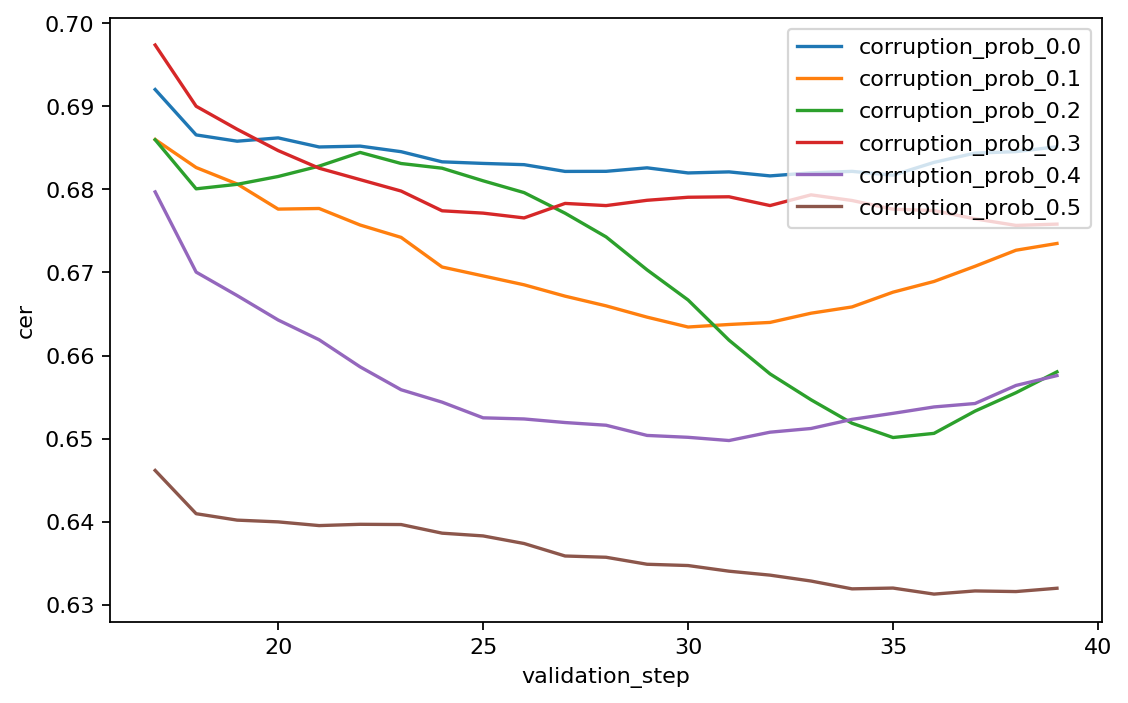

In [17]:
model_name = 'carnelinet'

figure(figsize=(8, 5), dpi=160)

for corruption_prob in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
    res = pd.read_csv(root_dir + f'experiment_results/{model_name}_200_paired_dae_{corruption_prob}.csv')
    res['Value'].rolling(18, win_type='gaussian').mean(std=5).plot(label=f'corruption_prob_{corruption_prob}')

plt.legend(loc="upper right")
plt.ylabel('cer')
plt.xlabel('validation_step')

Text(0.5, 0, 'validation_step')

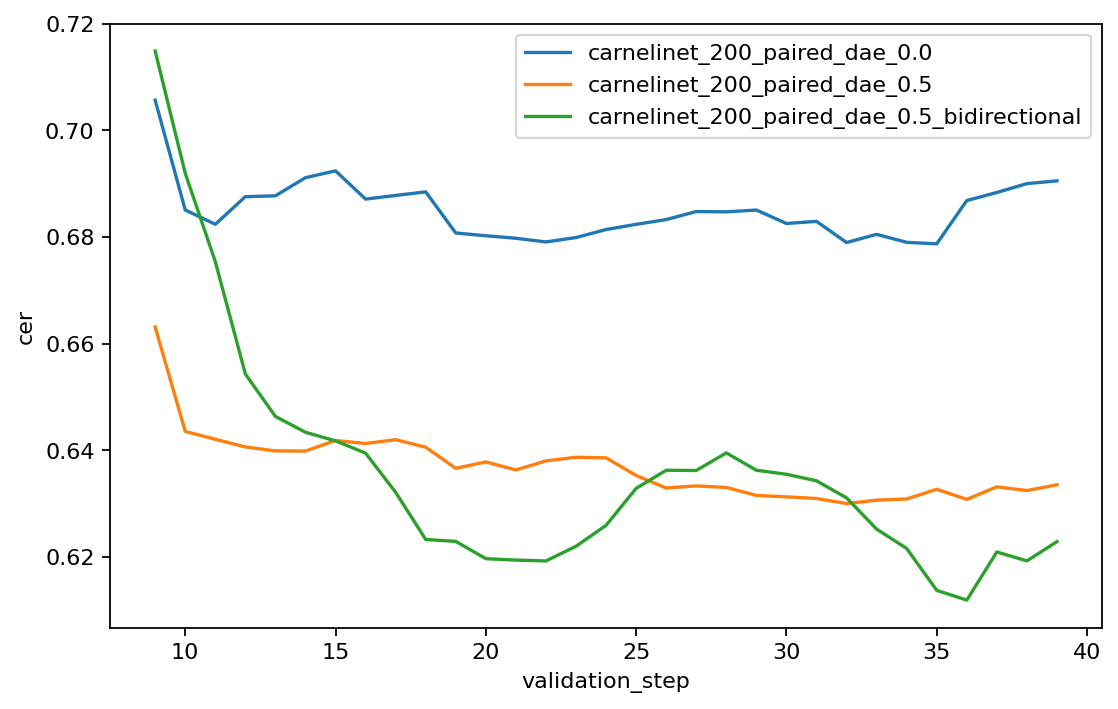

In [5]:
figure(figsize=(8, 5), dpi=160)

for experiment_path in ['carnelinet_200_paired_dae_0.0',
                        'carnelinet_200_paired_dae_0.5',
                        'carnelinet_200_paired_dae_0.5_bidirectional']:
    res = pd.read_csv(root_dir + f'experiment_results/{experiment_path}.csv')
    res['Value'][:40].rolling(10, win_type='gaussian').mean(std=5).plot(label=f'{experiment_path}')

plt.legend(loc="upper right")
plt.ylabel('cer')
plt.xlabel('validation_step')

Text(0.5, 0, 'validation_step')

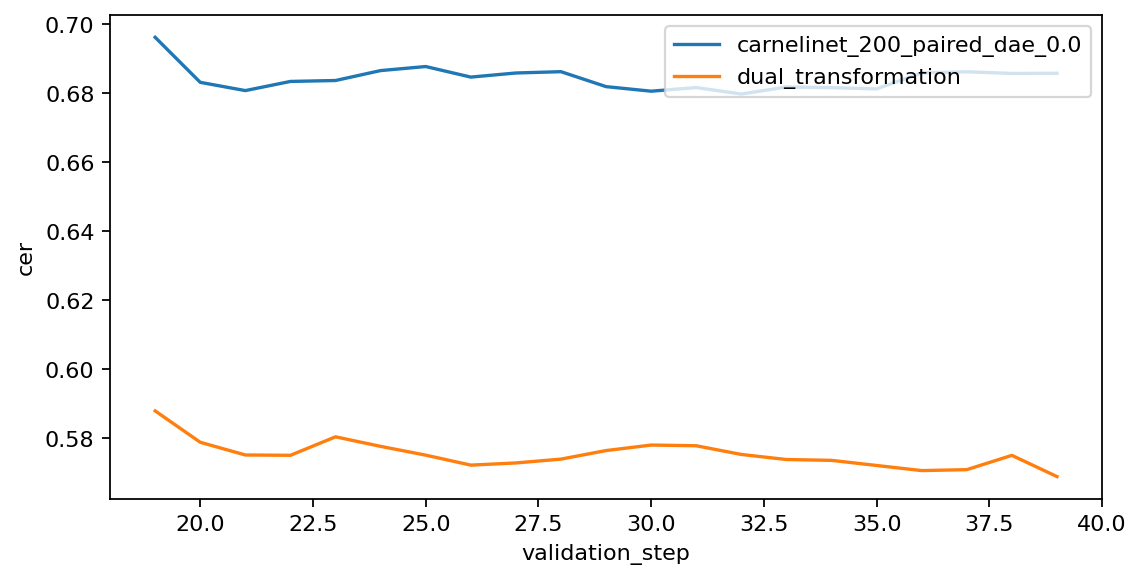

In [49]:
figure(figsize=(8, 4), dpi=160)

for experiment_path in ['carnelinet_200_paired_dae_0.0',
                       'dual_transformation']:
    res = pd.read_csv(root_dir + f'experiment_results/{experiment_path}.csv')
    if experiment_path == 'carnelinet_200_paired_dae_0.0':
        res['Value'].rolling(20, win_type='gaussian').mean(std=20).plot(label=f'{experiment_path}')
    else:
        res[::2].reset_index()['Value'].rolling(20, win_type='gaussian').mean(std=20).plot(label=f'{experiment_path}')
plt.legend(loc="upper right")
plt.ylabel('cer')
plt.xlabel('validation_step')

In [36]:
res[::2].reset_index()

,index,Wall time,Step,Value
0,0,1.653537e+09,199,0.796022
1,2,1.653537e+09,599,0.606323
2,4,1.653538e+09,999,0.605303
3,6,1.653538e+09,1399,0.578786
4,8,1.653538e+09,1799,0.580826
5,10,1.653538e+09,2199,0.617542
6,12,1.653538e+09,2599,0.657318
7,14,1.653538e+09,2999,0.544620
8,16,1.653538e+09,3399,0.537991
9,18,1.653538e+09,3799,0.557879


Some examples

# Validation

{"audio_filepath": "./an4/wav/an4test_clstk/fjlp/cen1-fjlp-b.wav", "duration": 2.8, "text": "p a t t e r s o n"}

{"audio_filepath": "./an4/wav/an4test_clstk/fjlp/cen2-fjlp-b.wav", "duration": 2.4, "text": "j a n e t"}

{"audio_filepath": "./an4/wav/an4test_clstk/fjlp/cen3-fjlp-b.wav", "duration": 1.3, "text": "one fifty"}

{"audio_filepath": "./an4/wav/an4test_clstk/fjlp/cen4-fjlp-b.wav", "duration": 2.3, "text": "s p e e r"}

{"audio_filepath": "./an4/wav/an4test_clstk/fjlp/cen5-fjlp-b.wav", "duration": 5.0, "text": "m c k e e s r o c k s"}

{"audio_filepath": "./an4/wav/an4test_clstk/fjlp/cen6-fjlp-b.wav", "duration": 2.3, "text": "one five one three six"}

{"audio_filepath": "./an4/wav/an4test_clstk/fjlp/cen7-fjlp-b.wav", "duration": 3.3, "text": "three three one oh one eight eight"}

{"audio_filepath": "./an4/wav/an4test_clstk/fjlp/cen8-fjlp-b.wav", "duration": 2.5, "text": "twelve twenty nine fifty nine"}

In [16]:
model.transcribe([
    "./an4/wav/an4test_clstk/fjlp/cen1-fjlp-b.wav",
    "./an4/wav/an4test_clstk/fjlp/cen2-fjlp-b.wav",
    "./an4/wav/an4test_clstk/fjlp/cen3-fjlp-b.wav",
    "./an4/wav/an4test_clstk/fjlp/cen4-fjlp-b.wav",
    "./an4/wav/an4test_clstk/fjlp/cen5-fjlp-b.wav",
    "./an4/wav/an4test_clstk/fjlp/cen6-fjlp-b.wav",
    "./an4/wav/an4test_clstk/fjlp/cen7-fjlp-b.wav",
    "./an4/wav/an4test_clstk/fjlp/cen8-fjlp-b.wav"
])

Transcribing:   0%|          | 0/2 [00:00<?, ?it/s]

['p d l four',
 'p a t c',
 ' ⁇  twenty five',
 'p e i g',
 'yes m a z rubout r nine',
 'one five five eight nine six',
 'fifty one nine a sixty',
 'eleven fourteen sixty one nine']

# Training

{"audio_filepath": "./an4/wav/an4_clstk/fnsv/cen1-fnsv-b.wav", "duration": 3.6, "text": "v e c c h i"}

{"audio_filepath": "./an4/wav/an4_clstk/fnsv/cen2-fnsv-b.wav", "duration": 2.8, "text": "n i c o l e"}

{"audio_filepath": "./an4/wav/an4_clstk/fnsv/cen3-fnsv-b.wav", "duration": 2.5, "text": "fifty six oh five"}

{"audio_filepath": "./an4/wav/an4_clstk/fnsv/cen4-fnsv-b.wav", "duration": 4.7, "text": "e l l s w o r t h"}

{"audio_filepath": "./an4/wav/an4_clstk/fnsv/cen5-fnsv-b.wav", "duration": 5.2, "text": "p i t t s b u r g h"}

{"audio_filepath": "./an4/wav/an4_clstk/fnsv/cen6-fnsv-b.wav", "duration": 2.6, "text": "one five two three two"}

{"audio_filepath": "./an4/wav/an4_clstk/fnsv/cen7-fnsv-b.wav", "duration": 3.9, "text": "six six one five zero six four"}

{"audio_filepath": "./an4/wav/an4_clstk/fnsv/cen8-fnsv-b.wav", "duration": 3.4, "text": "january fifteenth nineteen sixty three"}

In [17]:
model.transcribe([
    "./an4/wav/an4_clstk/fnsv/cen1-fnsv-b.wav",
    "./an4/wav/an4_clstk/fnsv/cen2-fnsv-b.wav",
    "./an4/wav/an4_clstk/fnsv/cen3-fnsv-b.wav",
    "./an4/wav/an4_clstk/fnsv/cen4-fnsv-b.wav",
    "./an4/wav/an4_clstk/fnsv/cen5-fnsv-b.wav",
    "./an4/wav/an4_clstk/fnsv/cen6-fnsv-b.wav",
    "./an4/wav/an4_clstk/fnsv/cen7-fnsv-b.wav",
    "./an4/wav/an4_clstk/fnsv/cen8-fnsv-b.wav",
])

Transcribing:   0%|          | 0/2 [00:00<?, ?it/s]

['v e c c h i',
 'n i c o l e',
 'fifty six oh five',
 'e l l s w o r t h',
 'p i t t s b u r g h',
 ' ⁇  one five two three two',
 'six six one five zero six four',
 'january fifteenth nineteen sixty three']

In [16]:
!python process_asr_text_tokenizer.py --manifest='an4/train_manifest_200.json,an4/test_manifest.json' \
        --data_root="tokenizer" \
        --vocab_size=1024 \
        --tokenizer="spe" \
        --log

/media/boris/F/anaconda3/envs/nemo/lib/python3.9/site-packages/apex/pyprof/__init__.py:5: FutureWarning: pyprof will be removed by the end of June, 2022
  warnings.warn("pyprof will be removed by the end of June, 2022", FutureWarning)
INFO:root:Corpus already exists at path : tokenizer/text_corpus/document.txt
[NeMo I 2022-05-14 01:26:29 sentencepiece_tokenizer:307] Processing tokenizer/text_corpus/document.txt and store at tokenizer/tokenizer_spe_bpe_v1024
sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=tokenizer/text_corpus/document.txt --model_prefix=tokenizer/tokenizer_spe_bpe_v1024/tokenizer --vocab_size=1024 --shuffle_input_sentence=true --hard_vocab_limit=false --model_type=bpe --character_coverage=1.0 --bos_id=-1 --eos_id=-1 --normalization_rule_name=nmt_nfkc_cf
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: tokenizer/text_corpus/document.txt
  input_format: 
  model_prefix: tokenizer/tokenizer_spe_bpe_v1024/tokenizer
  m